In [2]:
###MNIST Image Classification
##1D
from tensorflow import keras
from keras.datasets import mnist

2024-02-15 06:35:06.120880: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-15 06:35:06.120984: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-15 06:35:06.439709: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
(X_train,y_train),(X_test, y_test)= mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [5]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D

In [6]:
X_train=X_train.reshape(60000,784)
X_test = X_test.reshape(10000, 784)
X_train=X_train.astype('float32')
X_test=X_test.astype('float32')

In [7]:
X_train/=255.0 
X_test/=255.0 

In [8]:
n_classes=10
y_train.shape

(60000,)

In [9]:
from keras.utils import to_categorical
y_train= keras.utils.to_categorical(y_train, n_classes)
y_test=keras.utils.to_categorical(y_test, n_classes)

In [10]:
print(y_train.shape, y_test.shape)

(60000, 10) (10000, 10)


In [11]:
model=Sequential()
model.add(Dense(100, input_shape=(784,), activation='relu'))
model.add(Dense(10, activation='softmax'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
model.fit(X_train, y_train, batch_size=128, epochs=10, validation_data=(X_test, y_test))


Epoch 1/10


I0000 00:00:1707978928.007695     102 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


469/469 [==============================] - 5s 4ms/step - loss: 0.3849 - accuracy: 0.8937 - val_loss: 0.2051 - val_accuracy: 0.9406
Epoch 2/10
469/469 [==============================] - 2s 3ms/step - loss: 0.1784 - accuracy: 0.9499 - val_loss: 0.1488 - val_accuracy: 0.9561
Epoch 3/10
469/469 [==============================] - 2s 3ms/step - loss: 0.1308 - accuracy: 0.9626 - val_loss: 0.1238 - val_accuracy: 0.9639
Epoch 4/10
469/469 [==============================] - 2s 3ms/step - loss: 0.1036 - accuracy: 0.9704 - val_loss: 0.1026 - val_accuracy: 0.9686
Epoch 5/10
469/469 [==============================] - 2s 3ms/step - loss: 0.0853 - accuracy: 0.9757 - val_loss: 0.0916 - val_accuracy: 0.9725
Epoch 6/10
469/469 [==============================] - 2s 3ms/step - loss: 0.0717 - accuracy: 0.9792 - val_loss: 0.0866 - val_accuracy: 0.9737
Epoch 7/10
469/469 [==============================] - 2s 3ms/step - loss: 0.0609 - accuracy: 0.9827 - val_loss: 0.0836 - val_accuracy: 0.9745
Epoch 8/10
469/46

In [14]:
###CNN Model
from tensorflow import keras
from keras.datasets import mnist
(X_train,y_train),(X_test, y_test)= mnist.load_data()

In [15]:
X_train=X_train.reshape(60000,28,28,1)  ##input vector of 28x28 pixels
X_test = X_test.reshape(10000, 28,28,1)
X_train=X_train.astype('float32')
X_test=X_test.astype('float32')

In [16]:
X_train/=255.0 
X_test/=255.0 

In [17]:
n_classes=10
Y_train = keras.utils.to_categorical(y_train, n_classes)
Y_test =  keras.utils.to_categorical(y_test, n_classes)

In [18]:
print(y_train.shape,Y_train.shape)

(60000,) (60000, 10)


In [19]:
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.layers import Dense, Flatten, MaxPool2D, Activation, Dropout


##linear stack of layers
model1=Sequential()
model1.add(Conv2D(25, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(28,28,1)))
model1.add(MaxPool2D(pool_size=(1,1))) ###downsampling
model1.add(Dropout(0.1))

model1.add(Conv2D(50, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(28,28,1)))
model1.add(MaxPool2D(pool_size=(2,2))) ###downsampling
model1.add(Dropout(0.5))

model1.add(Conv2D(25, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(28,28,1)))
model1.add(MaxPool2D(pool_size=(1,1))) ###downsampling
model1.add(Dropout(0.1))

model1.add(Flatten())

model1.add(Dense(100, activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(10, activation='softmax'))
model1.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')


In [20]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 25)        250       
                                                                 
 max_pooling2d (MaxPooling2  (None, 26, 26, 25)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 26, 26, 25)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 50)        11300     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 12, 12, 50)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 12, 12, 50)       

In [21]:
h = model1.fit(X_train, Y_train, batch_size=64, epochs=8, validation_split=0.2)

Epoch 1/8


2024-02-15 06:36:40.534900: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_1/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


750/750 [==============================] - 11s 7ms/step - loss: 0.3242 - accuracy: 0.8985 - val_loss: 0.0739 - val_accuracy: 0.9787
Epoch 2/8
750/750 [==============================] - 5s 6ms/step - loss: 0.1163 - accuracy: 0.9659 - val_loss: 0.0500 - val_accuracy: 0.9852
Epoch 3/8
750/750 [==============================] - 4s 6ms/step - loss: 0.0896 - accuracy: 0.9727 - val_loss: 0.0412 - val_accuracy: 0.9878
Epoch 4/8
750/750 [==============================] - 5s 6ms/step - loss: 0.0701 - accuracy: 0.9798 - val_loss: 0.0413 - val_accuracy: 0.9886
Epoch 5/8
750/750 [==============================] - 5s 6ms/step - loss: 0.0654 - accuracy: 0.9810 - val_loss: 0.0355 - val_accuracy: 0.9898
Epoch 6/8
750/750 [==============================] - 5s 6ms/step - loss: 0.0544 - accuracy: 0.9831 - val_loss: 0.0367 - val_accuracy: 0.9890
Epoch 7/8
750/750 [==============================] - 5s 6ms/step - loss: 0.0499 - accuracy: 0.9845 - val_loss: 0.0386 - val_accuracy: 0.9893
Epoch 8/8
750/750 [===

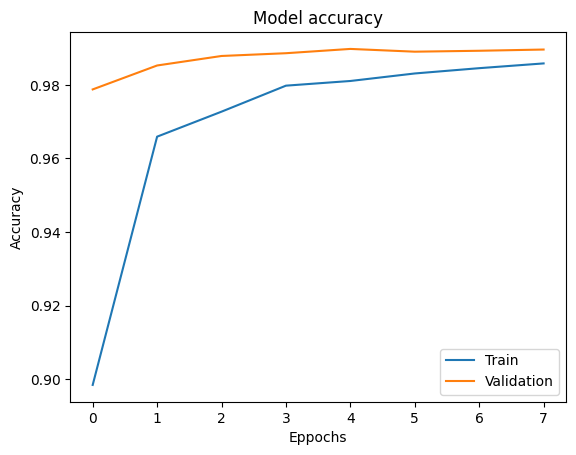

In [22]:
import matplotlib.pyplot as plt
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.title("Model accuracy")

plt.ylabel('Accuracy')
plt.xlabel("Eppochs")

plt.legend(['Train', 'Validation'], loc='best')
plt.show()

In [23]:
test_loss, test_accuracy=model1.evaluate(X_test, Y_test)
print(test_loss, test_accuracy)

313/313 [==============================] - 1s 4ms/step - loss: 0.0233 - accuracy: 0.9922
0.023258449509739876 0.9922000169754028


In [24]:
from sklearn.metrics import classification_report
import numpy as np
y_pred_prob = model1.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)
report = classification_report(y_test, y_pred)

print(report)


313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      1.00      0.99      1032
           3       0.99      1.00      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       1.00      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [31]:
i = np.random.randint(0, len(X_test))
image = X_test[i]
true_label = y_test[i]
y_pred_prob = model1.predict(image.reshape(1, 28, 28, 1))
predicted_label = np.argmax(y_pred_prob)

1/1 [==============================] - 0s 19ms/step


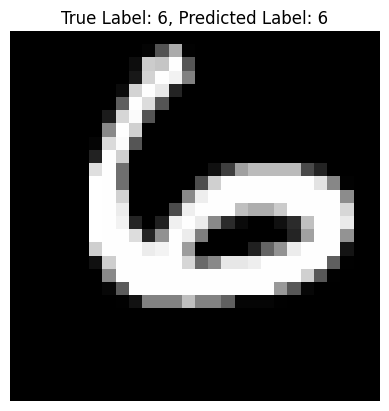

In [32]:
class_names = [0,1,2,3,4,5,6,7,8,9]
plt.imshow(image.reshape(28, 28), cmap='gray')
plt.title(f'True Label: {class_names[true_label]}, Predicted Label: {class_names[predicted_label]}')
plt.axis('off')
plt.show()

In [33]:
###Using Keras-tuner
from tensorflow import keras
from keras.datasets import mnist
(X_train,y_train),(X_test, y_test)= mnist.load_data()

In [34]:
X_train=X_train.astype('float32')
X_test=X_test.astype('float32')
X_train/=255.0 
X_test/=255.0 
n_classes=10
Y_train = keras.utils.to_categorical(y_train, n_classes)
Y_test =  keras.utils.to_categorical(y_test, n_classes)

In [35]:
def build_model(hp):
    model=keras.Sequential([
        keras.layers.Conv2D(
            filters=hp.Int('conv_1_filter', min_value=32, max_value=128, step=8),
            kernel_size=hp.Choice('conv_1_kernel', values=[3,5]),
            activation='relu',
            input_shape=(28,28,1)
        ),
        
        keras.layers.Dropout(hp.Choice('dropout_1', values=[0.1,0.5])),
        
        keras.layers.Conv2D(
            filters=hp.Int('conv_2_filter', min_value=32, max_value=128, step=8),
            kernel_size=hp.Choice('conv_2_kernel', values=[3,5]),
            activation='relu'
        ),
        
        keras.layers.Dropout(hp.Choice('dropout_2', values=[0.1,0.5])),
        
        keras.layers.Conv2D(
            filters=hp.Int('conv_2_filter', min_value=32, max_value=128, step=8),
            kernel_size=hp.Choice('conv_2_kernel', values=[3,5]),
            activation='relu'
        ),
        
        keras.layers.Dropout(hp.Choice('dropout_2', values=[0.1,0.5])),
        
        keras.layers.Flatten(),
        
        keras.layers.Dense(
            units=hp.Int('dense_1_units',min_value=32, max_value=128, step=16),
            activation='relu'
        ),
        
        keras.layers.Dropout(hp.Choice('dropout_3', values=[0.1,0.5])),
        
        keras.layers.Flatten(),
        
        keras.layers.Dense(
            units=hp.Int('dense_1_units',min_value=32, max_value=128, step=16),
            activation='relu'
        ),
        
        keras.layers.Dropout(hp.Choice('dropout_4', values=[0.1,0.5])),
        
        keras.layers.Dense(10, activation='softmax') #10 outputs        
    ])
    
    
    model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2,1e-3])),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy'])
    
    return model

In [36]:
from keras_tuner import RandomSearch
from keras_tuner.engine.hyperparameters import HyperParameters
tuner=RandomSearch(build_model, objective='val_accuracy', max_trials=8, directory='output', project_name='MNIST')

In [37]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [38]:
tuner.search(X_train, y_train, epochs=4, validation_split=0.3)

Trial 8 Complete [00h 00m 56s]
val_accuracy: 0.9863333106040955

Best val_accuracy So Far: 0.9863333106040955
Total elapsed time: 00h 07m 35s


In [39]:
nn=tuner.get_best_models(num_models=1)[0]
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 40)        400       
                                                                 
 dropout (Dropout)           (None, 26, 26, 40)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 104)       104104    
                                                                 
 dropout_1 (Dropout)         (None, 22, 22, 104)       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 18, 18, 104)       270504    
                                                                 
 dropout_2 (Dropout)         (None, 18, 18, 104)       0         
                                                                 
 flatten (Flatten)           (None, 33696)             0

In [ ]:
##nn.fit(X_train, y_train, epochs=8,validation_split=0.3, initial_epoch=4)

In [40]:
loss,accuracy=nn.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0533 - accuracy: 0.9863


In [41]:
print("Test loss: ", loss)
print("Test accuracy: ", accuracy)

Test loss:  0.05330241098999977
Test accuracy:  0.986299991607666


In [ ]:
##Model performance on other dataset

import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, filename))
        if img is not None:
            img = preprocess_image(img)
            images.append(img)
    return np.array(images)

def preprocess_image(img):
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(gray_img, (28, 28))
    img = img / 255.0 
    img = 255 - img
    return img

new_images = load_images_from_folder('/kaggle/input/images')

random_index = np.random.randint(0, len(new_images))
image = new_images[random_index]

image_for_prediction = image.reshape(1, 28, 28)

prediction = nn.predict(image_for_prediction)
predicted_class = np.argmax(prediction)

print("Index: ", random_index)
plt.imshow(image, cmap='gray')
plt.title(f'Predicted Class: {predicted_class}')
plt.axis('off')
plt.show()

In [42]:
nn.save('model.h5')

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
